<a href="https://colab.research.google.com/github/treezy254/Algorithmic-Trading-Strategy/blob/master/data%20viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('dark_background')

data = pd.read_csv('AAPL.csv', index_col=0)

In [2]:
data.head()

,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
Date,,,,,,
5/27/2014,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
5/28/2014,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
5/29/2014,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
5/30/2014,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
6/2/2014,90.565712,90.690002,88.928574,89.807144,81.339699,92337700


In [3]:
data.isnull().sum()

Open Price         0
High Price         0
Low Price          0
Close Price        0
Adj Close Price    0
Volume             0
dtype: int64

In [4]:
data.describe()

,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,157.978552,159.539694,156.544346,158.115756,152.312201,3.838967e+07
std,56.184602,57.034062,55.603048,56.412547,58.609623,1.950338e+07
min,87.982857,89.408569,87.947144,89.144287,80.739334,1.136200e+07
25%,111.967497,112.857502,110.614999,112.017502,104.381134,2.515898e+07
50%,145.315002,146.720001,144.325005,145.780006,139.728653,3.339445e+07
75%,189.650001,191.377503,187.724998,190.017494,185.526695,4.646998e+07
max,324.739990,327.850006,323.350006,327.200012,326.316681,1.898463e+08


In [5]:
data.shape

(1510, 6)

### Visualizing the **data**

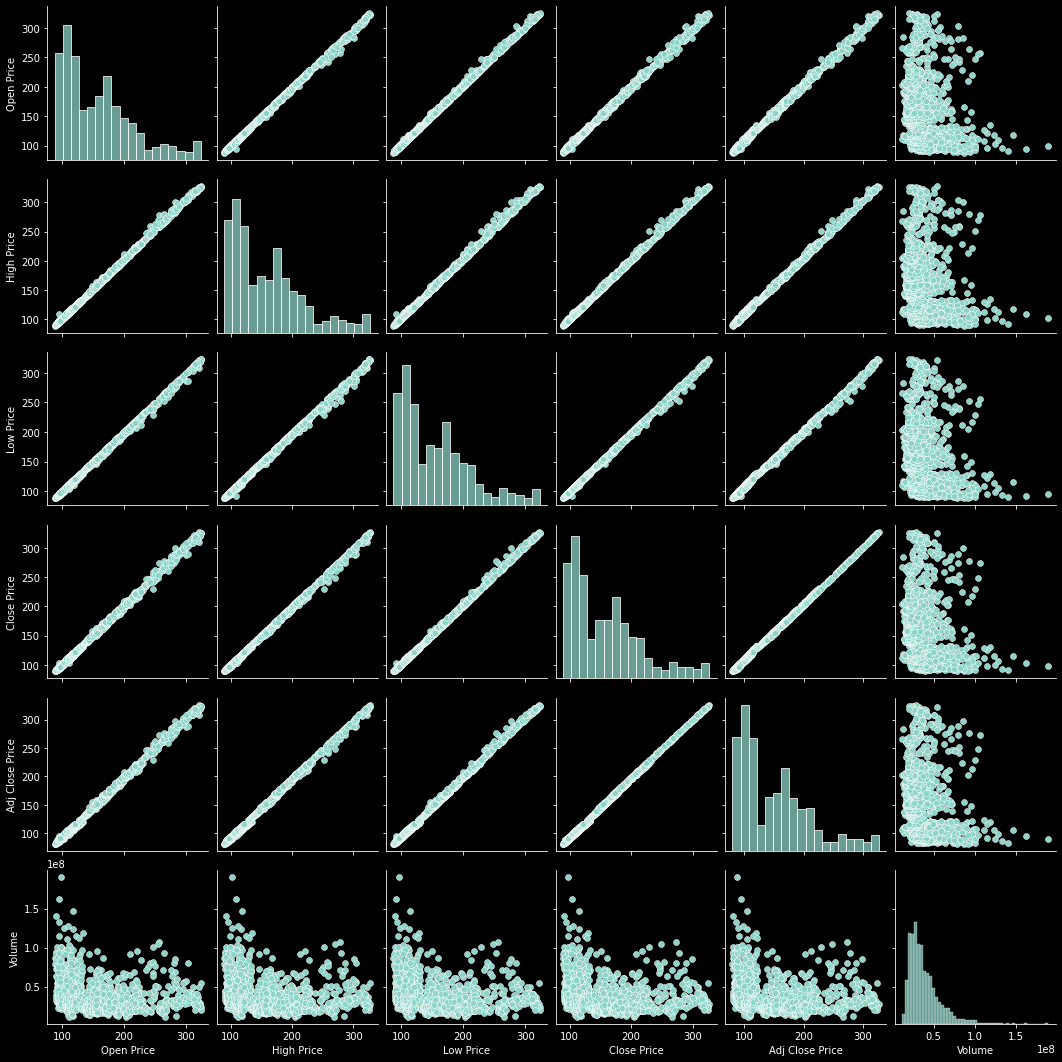

In [6]:
import seaborn as sns
sns.pairplot(data)

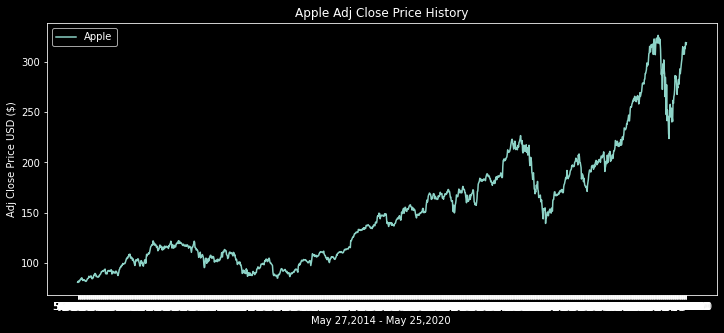

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(data['Adj Close Price'], label='Apple')
plt.title('Apple Adj Close Price History')
plt.xlabel("May 27,2014 - May 25,2020 ")
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc="upper left")
plt.show()

### Create a simple moving average with a 7 day window

In [8]:
sma30 = pd.DataFrame()

In [9]:
sma30["Adj Close Price"]=data["Adj Close Price"].rolling(window=30).mean()

In [10]:
sma30

,Adj Close Price
Date,
5/27/2014,NaN
5/28/2014,NaN
5/29/2014,NaN
5/30/2014,NaN
6/2/2014,NaN
...,...
5/18/2020,287.864806
5/19/2020,289.577426
5/20/2020,291.594106


### to create a simple moving average with a 30 day window

In [11]:
sma100=pd.DataFrame()

In [12]:
sma100["Adj Close Price"]= data["Adj Close Price"].rolling(window=100).mean()

In [13]:
sma100

,Adj Close Price
Date,
5/27/2014,NaN
5/28/2014,NaN
5/29/2014,NaN
5/30/2014,NaN
6/2/2014,NaN
...,...
5/18/2020,289.734840
5/19/2020,290.037927
5/20/2020,290.345799


### Visualizing the new data

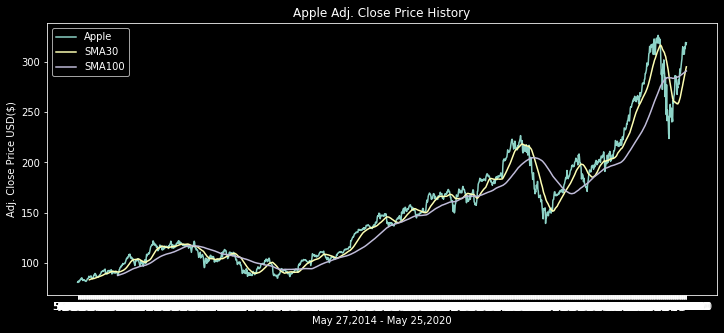

In [14]:
plt.figure(figsize=(12,5))
plt.plot(data['Adj Close Price'], label='Apple')
plt.plot(sma30['Adj Close Price'], label='SMA30')
plt.plot(sma100['Adj Close Price'], label='SMA100')
plt.title("Apple Adj. Close Price History")
plt.xlabel('May 27,2014 - May 25,2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

### creating a dataframe to store the data

In [15]:
data2=pd.DataFrame()

In [16]:
data2["apple"]=data["Adj Close Price"]

In [17]:
data2["SMA30"]=sma30["Adj Close Price"]

In [18]:
data2["SMA100"]=sma100["Adj Close Price"]

In [19]:
data2

,apple,SMA30,SMA100
Date,,,
5/27/2014,80.948952,NaN,NaN
5/28/2014,80.739334,NaN,NaN
5/29/2014,82.210480,NaN,NaN
5/30/2014,81.902557,NaN,NaN
6/2/2014,81.339699,NaN,NaN
...,...,...,...
5/18/2020,314.959991,287.864806,289.734840
5/19/2020,313.140015,289.577426,290.037927
5/20/2020,319.230011,291.594106,290.345799


### Function to signal when to buy or sell a stock

In [20]:
def buySell(data2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(data2)):
    if data2['SMA30'][i] > data2['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data2['apple'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    
    elif data2['SMA30'][i] < data2['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data2['apple'][i])
        flag = 0

      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
      
  return(sigPriceBuy, sigPriceSell)

In [21]:
buySell = buySell(data2)

In [22]:
data2['Buy Signal Price'] = buySell[0]
data2['Sell Signal Price'] = buySell[1]

In [23]:
data2

,apple,SMA30,SMA100,Buy Signal Price,Sell Signal Price
Date,,,,,
5/27/2014,80.948952,NaN,NaN,NaN,NaN
5/28/2014,80.739334,NaN,NaN,NaN,NaN
5/29/2014,82.210480,NaN,NaN,NaN,NaN
5/30/2014,81.902557,NaN,NaN,NaN,NaN
6/2/2014,81.339699,NaN,NaN,NaN,NaN
...,...,...,...,...,...
5/18/2020,314.959991,287.864806,289.734840,NaN,NaN
5/19/2020,313.140015,289.577426,290.037927,NaN,NaN
5/20/2020,319.230011,291.594106,290.345799,319.230011,NaN


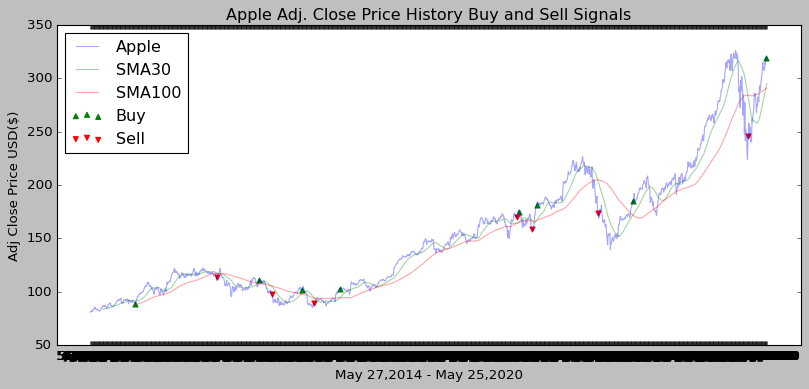

In [24]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(data2['apple'], label='Apple', alpha=0.35)
plt.plot(data2['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data2['SMA100'],label='SMA100', alpha=0.35)
plt.scatter(data2.index, data2['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(data2.index, data2['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('Apple Adj. Close Price History Buy and Sell Signals')
plt.xlabel("May 27,2014 - May 25,2020")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()